# Blinkit Analysis

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Raw Data

In [ ]:
df=pd.read_csv('blinkit_data.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.columns

# Data Cleaning

In [ ]:
df['Item Fat Content'].unique()

In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

# Buisness Requirement

KPI's Requirement

1. Total Sales: The overall revenue generated from all items sold.

In [ ]:
total_sales = df['Sales'].sum()
print(total_sales)

2. Average Sales: The average revenue per sale.

In [ ]:
avg_sales = df['Sales'].mean()
print(avg_sales)

3. Number of Items: The total count of different items sold.

In [ ]:
no_of_items_sold = df['Sales'].count()
print(no_of_items_sold)

4. Average Rating: The average customer rating for items sold.

In [ ]:
avg_ratings = df['Rating'].mean()
print(avg_ratings)

# Chart's Requirements

1. Total Sales by Fat Content:

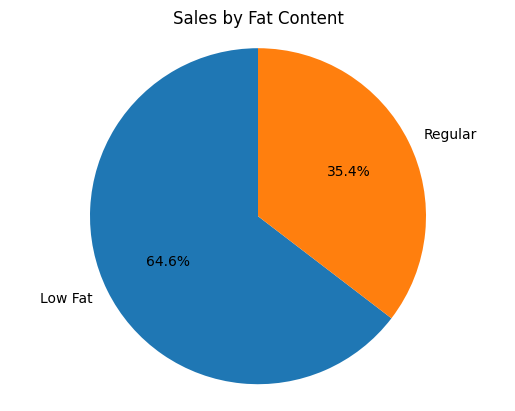

In [45]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()


2. Total Sales by Item Type:

In [ ]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)   
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


3. Fat Content by Outlet for Total Sales:

In [ ]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content']) ['Sales'].sum().unstack()
grouped = grouped [['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()

plt.show()

4. Total Sales by Outlet Establishment:

In [ ]:
sales_by_year = df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'(y:,.0f)', ha='center', va='bottom', fontsize=8)
plt.tight_layout()

plt.show()

5. Sales by Outlet Size:

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))

plt.pie(sales_by_size, 
        labels=sales_by_size.index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()


6. Sales by Outlet

In [ ]:
sales_by_location = df.groupby ('Outlet Location Type') ['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3)) # Smaller height, enough width

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() #Ensures Layout fits without scroll

plt.show()